In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
ls ../../Data

BlackFriday.csv*		sales_data_sample.csv
customer_data.xlsx		sales_data_sample.xlsx
government_purchase_orders.csv	sales_data_sample_no_customer.xlsx
part_usage_trailing_12.xlsx	san_francisco_purchase_data.csv
purchases_by_vendor.xlsx


In [3]:
sales_sheet = pd.read_csv('../../Data/BlackFriday.csv')

In [4]:
sales_sheet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
sales_sheet.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
sales_figures = sales_sheet.groupby("Product_Category_1").sum()
sales_figures

,User_ID,Occupation,Marital_Status,Product_Category_2,Product_Category_3,Purchase
Product_Category_1,,,,,,
1,138766965949,1144694,55123,1020975.0,1146723.0,1882666325
2,23569592048,194959,9553,150528.0,170323.0,264497242
3,19907401743,156392,7691,88110.0,100447.0,200412211
4,11601825250,91962,4495,68442.0,55754.0,26937957
5,149035496480,1187949,60181,939461.0,264880.0,926917497
6,20224815989,165127,8178,192590.0,117271.0,319355286
7,3678889536,29218,1664,3708.0,0.0,60059209
8,112467394369,885163,47648,765996.0,145704.0,840693394
9,405258962,3630,162,6045.0,0.0,6277472


In [7]:
sales = sales_figures.sort_values(by='Purchase',ascending=False)
sales = sales[['Purchase']]
sales

,Purchase
Product_Category_1,
1,1882666325
5,926917497
8,840693394
6,319355286
2,264497242
3,200412211
16,143168035
11,112203088
10,99029631


In [8]:
sales["cumpercentage"] = sales["Purchase"].cumsum()/sales["Purchase"].sum()*100
sales

,Purchase,cumpercentage
Product_Category_1,,
1,1882666325,37.520740
5,926917497,55.993812
8,840693394,72.748475
6,319355286,79.113090
2,264497242,84.384408
3,200412211,88.378538
16,143168035,91.231816
11,112203088,93.467976
10,99029631,95.441595


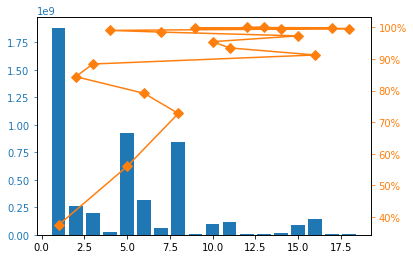

In [10]:
fig, ax = plt.subplots()
ax.bar(sales.index, sales["Purchase"], color="C0")
ax2 = ax.twinx()
ax2.plot(sales.index, sales["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()